EDA 팀 미니 프로젝트 (2차 프로젝트 전)
2차 프로젝트 10/14

# EDA
- Exploratory Data Analysis, 탐색적 데이터 분석 (탐색적 요인 분석)

### EDA 절차

1. **데이터 로드**
2. **데이터 구조 및 기초 통계 확인**
3. **결측치 및 이상치 탐색**
4. **데이터 시각화를 통한 탐색**
5. **데이터 정제 및 전처리**
6. **데이터 변환 및 피처 엔지니어링**
7. **데이터 분할**

### EDA 절차

1. **데이터 로드**
- 다양한 소스에서 데이터를 로드한다. (파일, 데이터베이스, API 등에서 데이터를 불러온다.)
- 데이터가 로드된 후에는 구조를 확인하기 위해 첫 몇 줄의 데이터를 출력해 본다.
2. **데이터 구조 및 기초 통계 확인**
- 데이터의 구조를 파악하기 위해 컬럼 정보와 데이터 타입을 확인한다.
- 데이터의 기본 통계 정보를 출력하여 각 변수의 분포와 특성을 살펴본다.
- df.head(), df.info(), df.describe() 등의 함수를 사용한다.
3. **결측치 및 이상치 탐색**
- 결측치(NaN) 값이 존재하는지 확인하고, 이를 처리하는 방법을 결정한다.
- 데이터에 존재하는 이상치(Outlier)를 탐지하고, 이를 어떻게 처리할지 결정한다.
- df.isnull().sum(), df.boxplot() 등의 함수를 활용한다.
4. **데이터 시각화를 통한 탐색**
- 데이터를 시각화하여 변수 간의 관계, 분포 등을 파악한다.
- 히스토그램, 박스플롯, 상관관계 행렬 등 다양한 그래프를 통해 데이터의 특성을 시각적으로 확인한다.
- sns.countplot(), sns.heatmap() 등의 함수를 사용한다.
5. **데이터 정제 및 전처리**
- 필요 없는 변수나 중복 데이터를 제거한다.
- 범주형 데이터를 처리하거나, 스케일링 및 정규화를 통해 모델에 적합한 형태로 데이터를 변환한다. 인코딩과 같은 것도 정규화의 방법이다.
- df.drop(), df.fillna(), pd.get_dummies() 등의 함수를 활용한다.
6. **데이터 변환 및 피처 엔지니어링**
- 새로운 피처를 생성하거나 기존 피처를 변환하여 분석에 적합한 형태로 데이터를 조정한다.
- 로그 변환, 다항식 피처 추가 등 다양한 기법을 통해 데이터를 변환할 수 있다.
- np.log(), PolynomialFeatures() 등의 함수를 활용한다.
7. **데이터 분할**
- 학습용과 테스트용 데이터로 분할한다.
- 이 과정은 모델을 평가하고 성능을 검증하는 데 중요한 단계이다.
- train_test_split() 함수를 사용한다.

In [ ]:
# 5, 6, 7 번 절차는 모델 평가 전에 해야 한다. 하나의 전처리 과정이라고 볼 수 있다.

In [2]:
!pip install seaborn

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [4]:
import matplotlib.font_manager as fm

In [8]:
# 폰트 설정, 한글 폰트도 깨지지 않게 Gulim 폰트 설정
font_path = "C:/Windows/Fonts/gulim.ttc"
font = fm.FontProperties(fname=font_path).get_name()

matplotlib.rc('font', family=font) # 한글 폰트 사용 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 사용 설정

In [39]:
# 1. 데이터 로드
df = pd.read_csv('./data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
# 2. 데이터 구조 및 기초 통계 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 3. 결측치 및 이상치 탐색
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df.boxplot()

<Axes: >

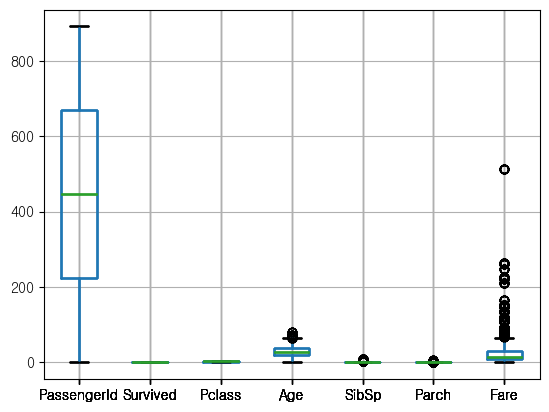

In [29]:
# - 이상치 탐색
df.boxplot()
plt.show()

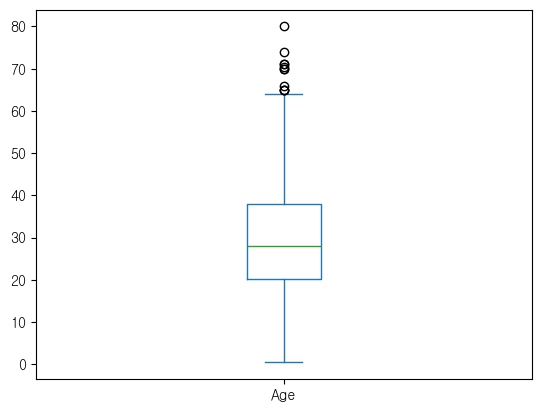

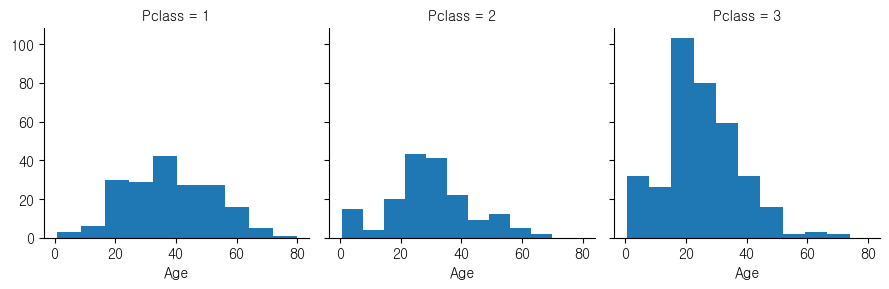

In [31]:
df['Age'].plot(kind='box')
grid = sns.FacetGrid(df, col='Pclass')
grid.map(plt.hist, 'Age')
plt.show()

In [32]:
df[df['Age'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [ ]:
# 결론 : 결측치 Age, Cabin, Embarked 존재
# 이상치 : Age 0~1 -> 하지만, 소수점으로 표현된 값은 개월수를 의미하는 것 같다.

In [ ]:
# 4. 데이터 시각화를 통한 탐색 # -> 범주형 데이터 시각화

##### **미니 프로젝트** 에서 사용하니 숙지할 것

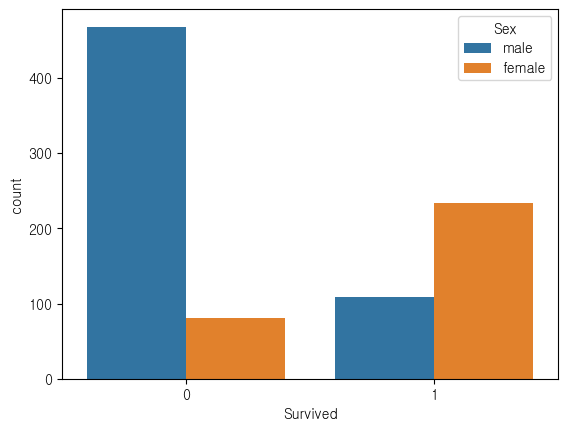

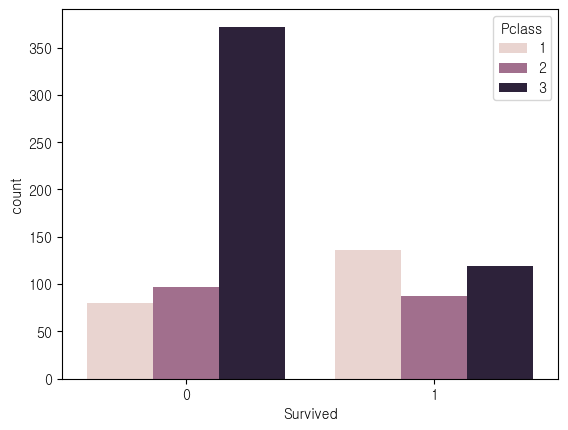

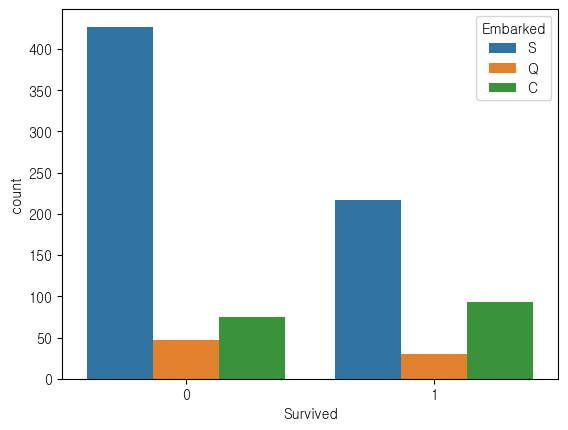

In [ ]:
sns.countplot(data=df, x='Survived', hue='Sex')
plt.show()
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.show()
sns.countplot(data=df, x='Survived', hue='Embarked')
plt.show()

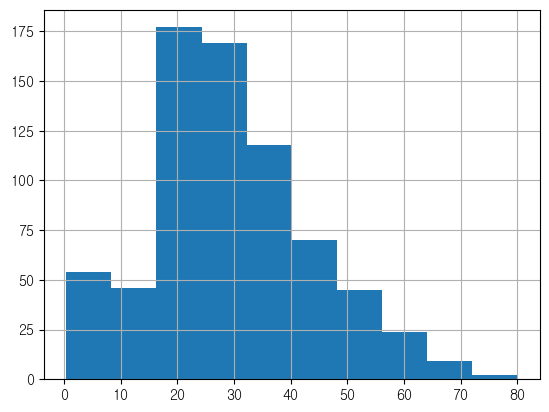

In [35]:
df['Age'].hist(bins=10)
plt.show()


In [ ]:
# heatmap 을 통해 범주형 데이터 상관 관계 확인
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()





##### corr : co relation, Pearson's correlation coefficient 1.0: 비례관계, -1.0: 반비례관계

In [ ]:
# numeric_only=True : 숫자 데이터만 추출하여 상관 관계 행렬 생성

In [ ]:
corr_matrix = df.corr(numeric_only=True) # 숫자 데이터만 추출하여 상관 관계 행렬 생성
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


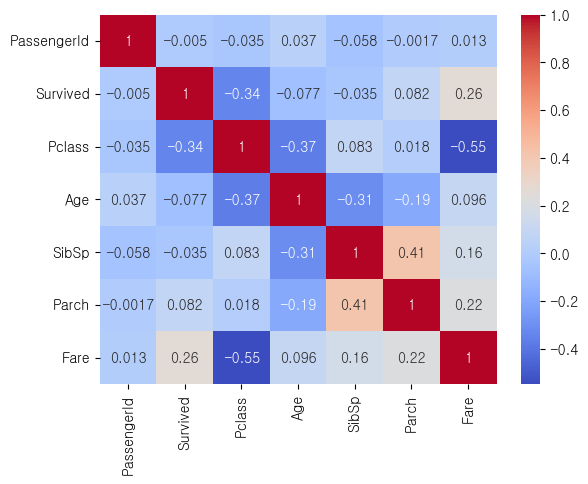

In [37]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [40]:
# 데이터를 변경해서 상관 관계 확인해보자. 아니면 추가해서 상관 관계 확인해보자.
# 남자, 여자를 1, 0 으로 변경해서 상관 관계 확인해보자.
df['Sex_code'] = df['Sex'].map({'male': 1, 'female': 0})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [41]:
corr_matrix = df.corr(numeric_only=True) # 숫자 데이터만 추출하여 상관 관계 행렬 생성
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_code
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333
Sex_code,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000


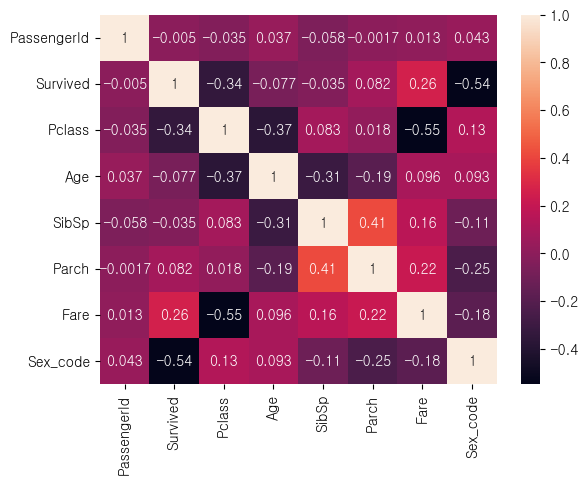

In [42]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# 1 값으로 나오는 것은 자기 자신을 상관 관계로 하고 있기 때문에 1로 나온다.

In [ ]:
2차 프로젝트때, 머신러닝 프로젝트때 -> 데이터의 상관 관계를 확인하는 것은 매우 중요하다.
인사이트를 도출하는데 있어서 중요한 요소이다.

In [43]:
# 5. 데이터 정제 및 전처리
df['Age'] = df['Age'].fillna(df['Age'].mean()) # 결측치 처리 -> 평균값으로 채워넣기
df['Age'].isnull().sum()

# 결측치 처리 : 평균값, 중간값, 최빈값, 0 으로 채워넣기
# df['Age'] = df['Age'].fillna(df['Age'].median()) # 중간값으로 채워넣기
# df['Age'] = df['Age'].fillna(df['Age'].mode()) # 최빈값으로 채워넣기
# df['Age'] = df['Age'].fillna(0) # 0 으로 채워넣기

np.int64(0)

In [44]:
# Cabin 컬럼 제거
df = df.drop('Cabin', axis=1)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1


In [45]:
# Family에 SibSp, Parch 컬럼 추가
df['Family'] = df['SibSp'] + df['Parch']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_code,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,0


In [47]:
# SibSp, Parch 컬럼 제거
df = df.drop(['SibSp', 'Parch'], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Sex_code,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S,0,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C,1,0


In [ ]:
# 6. 데이터 변환 및 피처 엔지니어링

In [ ]:
# 7. 데이터 분할